In [ ]:
#importing libraries
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Loading the Data
customers=pd.read_csv('/Users/apoorvakomatineni/Desktop/Project 2/customer_shopping_data.csv')

# Intial Data Exploration

In [ ]:
customers.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
customers.shape

(99457, 10)

**Changing Data Types**

In [ ]:
customers.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [ ]:
customers['gender']=customers['gender'].astype('str')
customers['gender']

0        Female
1          Male
2          Male
3        Female
4        Female
          ...  
99452    Female
99453      Male
99454      Male
99455      Male
99456    Female
Name: gender, Length: 99457, dtype: object

In [ ]:
customers['invoice_date']=customers['invoice_date'].astype('datetime64')
customers['invoice_date']

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_4436/3431524808.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customers['invoice_date']=customers['invoice_date'].astype('datetime64')


0       2022-05-08
1       2021-12-12
2       2021-09-11
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

In [ ]:
customers['customer_id']=customers['customer_id'].apply(lambda x : x[1:])

In [ ]:
customers['customer_id']

0        241288
1        111565
2        266599
3        988172
4        189076
          ...  
99452    441542
99453    569580
99454    103292
99455    800631
99456    273973
Name: customer_id, Length: 99457, dtype: object

In [ ]:
customers['customer_id'].nunique()

99457

**Null Values**

In [ ]:
customers.isna()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


In [ ]:
customers.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
customers['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [ ]:
customers['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [ ]:
customers['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

# Data Aggregations

In [ ]:
customers.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
#creating a new column for sales amount
customers['Sales']=customers['price']*customers['quantity']
customers['Sales']

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: Sales, Length: 99457, dtype: float64

In [ ]:
customers['Sales'].dtype

dtype('float64')

In [ ]:
customers['Sales'].mean()

2528.78926822647

In [ ]:
customers['customer_id'].nunique()

99457

In [ ]:
customers['Sales'].min()

5.23

In [ ]:
customers['Sales'].max()

26250.0

In [ ]:
customers['Sales'].median()

600.17

In [ ]:
def categoryfunc(x):
    if x <=1000:
         return 'Low'
    elif x<20000:
        return 'Medium'
    else:
        return 'High'


In [ ]:
categoryfunc(1000)

'Low'

In [ ]:
#creating new column customer category
customers['Customercategory']=customers['Sales'].apply(categoryfunc)

In [ ]:
customers.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales,Customercategory
0,I138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,Medium
1,I317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Medium
2,I127801,266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,Low
3,I173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,Medium
4,I337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,Low


In [ ]:
customers.groupby(by='category').sum()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_4436/2132221481.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers.groupby(by='category').sum()


,age,quantity,price,Sales
category,,,,
Books,216882,14982,226977.30,8.345529e+05
Clothing,1497054,103558,31075684.64,1.139968e+08
Cosmetics,657937,45465,1848606.90,6.792863e+06
Food & Beverage,640605,44277,231568.71,8.495351e+05
Shoes,436027,30217,18135336.89,6.655345e+07
Souvenir,216922,14871,174436.83,6.358247e+05
Technology,216669,15021,15772050.00,5.786235e+07
Toys,437032,30321,1086704.64,3.980426e+06


In [ ]:
salesbycategory = customers[['Sales','category']].groupby(by=['category']).sum()

In [ ]:
round(salesbycategory['Sales'],3)

category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: Sales, dtype: float64

In [ ]:
#creating new column called 'Year' which contains the 4 digit year
customers['year']=customers['invoice_date'].dt.strftime('%Y')
customers['year']

0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
99452    2022
99453    2021
99454    2021
99455    2021
99456    2022
Name: year, Length: 99457, dtype: object

In [ ]:
customersales_year=customers[['Sales','year']].groupby(by='year').sum()

In [ ]:
customersales_year.reset_index(inplace=True)

In [ ]:
customersales_year

,year,Sales
0,2021,1.145606e+08
1,2022,1.154368e+08
2,2023,2.150841e+07


In [ ]:
#creating new column called 'Month' which contains the Month Name
customers['month']=customers['invoice_date'].dt.strftime('%B')
customers['month']

0              May
1         December
2        September
3              May
4          October
           ...    
99452    September
99453    September
99454        March
99455        March
99456      October
Name: month, Length: 99457, dtype: object

In [ ]:
customersales_month=customers[['month','Sales']].groupby(by='month').sum()

In [ ]:
customersales_month.reset_index(inplace=True)

In [ ]:
customersales_month

,month,Sales
0,April,20360575.14
1,August,19812561.97
2,December,20099529.82
3,February,23980067.68
4,January,25755677.45
5,July,20721536.72
6,June,20344057.02
7,March,20826196.84
8,May,20608277.98
9,November,18700196.96


In [ ]:
customersales_month.sort_values(by='Sales',ascending=False)

,month,Sales
4,January,25755677.45
3,February,23980067.68
10,October,21049007.84
7,March,20826196.84
5,July,20721536.72
8,May,20608277.98
0,April,20360575.14
6,June,20344057.02
2,December,20099529.82
1,August,19812561.97


In [ ]:
customers.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'Sales',
       'Customercategory', 'year', 'month'],
      dtype='object')

In [ ]:
customers.drop(columns='year',inplace=True)

In [ ]:
customers

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales,Customercategory
0,I138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,Medium
1,I317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Medium
2,I127801,266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,Low
3,I173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,Medium
4,I337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,Low
99453,I325143,569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,Low
99454,I824010,103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,Low
99455,I702964,800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,Medium


**Comparative Analysis of Total Sales Monthly vs. Yearly Trends**

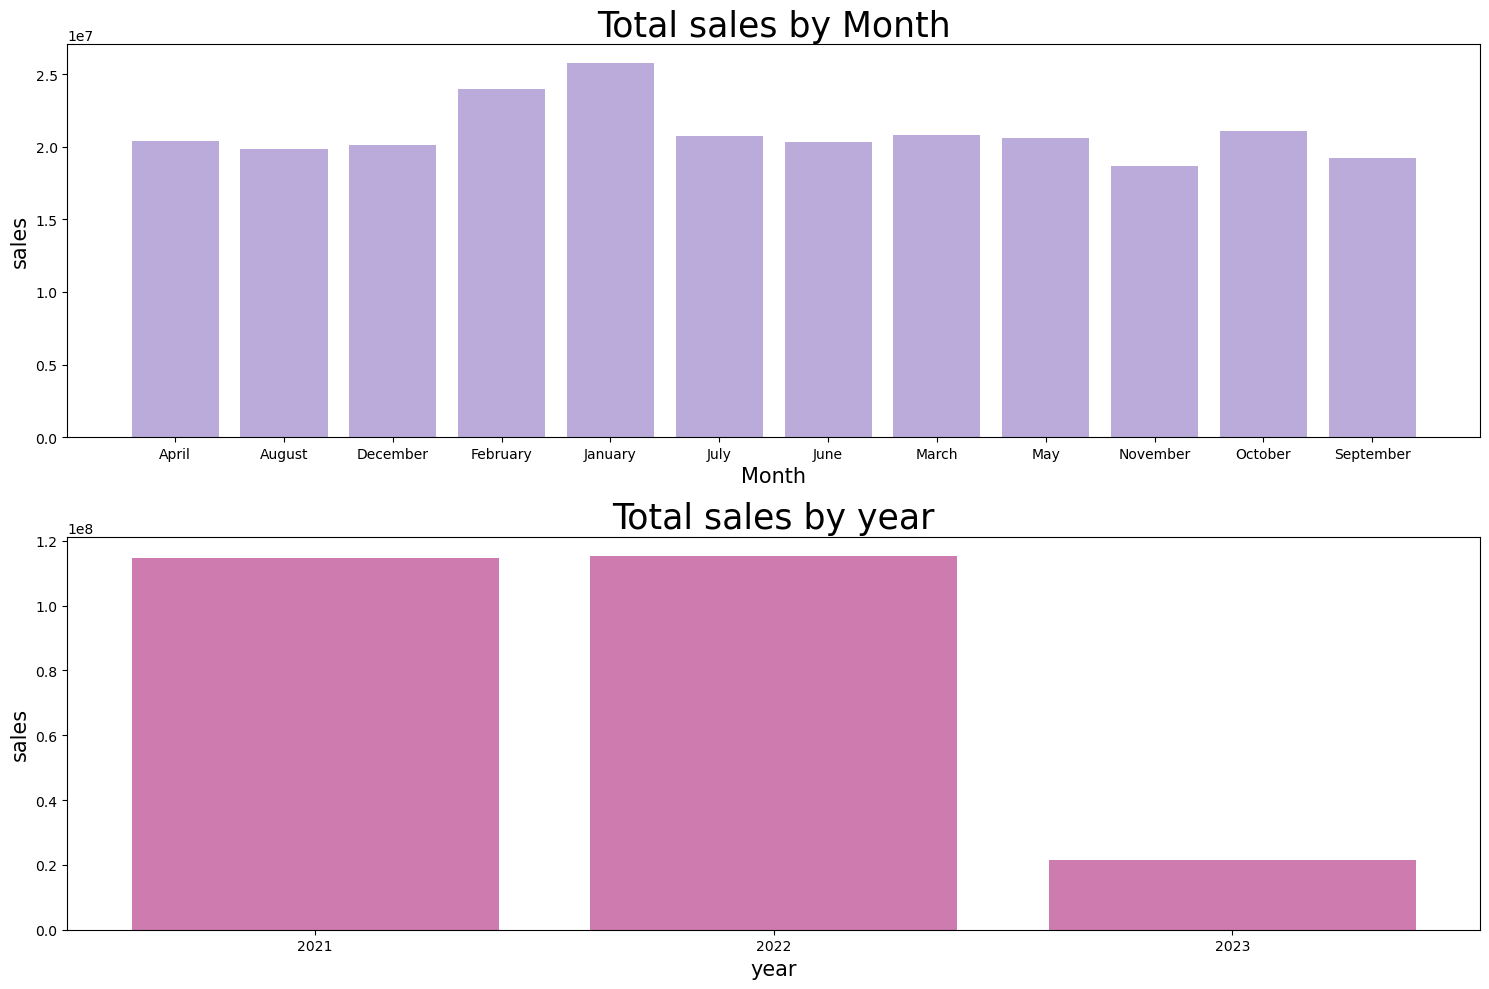

In [ ]:
fix, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10), tight_layout=True)

ax1.set_title('Total sales by Month', fontsize=25)
ax1.set_xlabel('Month', fontsize=15)
ax1.set_ylabel('sales', fontsize=15)

ax2.set_title('Total sales by year', fontsize=25)
ax2.set_xlabel('year', fontsize=15)
ax2.set_ylabel('sales', fontsize=15)

ax1.bar(customersales_month['month'],customersales_month['Sales'],color='#BAABDA')
ax2.bar(customersales_year['year'],customersales_year['Sales'],color='#CE7BB0')
plt.show()

# Customer Segmentation Using K-Means

# K-MEANS

it is unsupervised clustering ML algorithm
which means data is not labelled
1. kmeans: is used to group similar data points together in a process known as clustering. Clustering helps us understand our data in a unique way – by grouping things together into clusters.
k-means clustering divides data into a predefined number of clusters
k-means is designed to work with numerical features, as it relies on distance measures.
The aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.
2. Normalization:
we have to normalize the data before applying kmeans as normalization is a preprocessing step that ensures the features are on a consistent scale,for improving the performance and interpretability of machine learning models
3. In order to apply kmeans we need to make sure our data is normalized
4.need to do feature extraction which means to select only columns which are not categorical  to optimize the process of kmeans algorithm

to normalize the data we need to extract which columns to be considered
we need to consider only numeric because categorical columns wont make any sense when applying kmeans clustering

In [ ]:
# Select numerical columns for clustering
numerical_columns = ['Sales']

# Subset the DataFrame with numerical columns
numerical_data = customers[numerical_columns]

In [ ]:
# Standardize or normalize the numerical data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Converting the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)

# Reset the index
normalized_df.reset_index(drop=True, inplace=True)

After applying normalization, in order to fix the no of clusters for kmeans, it is always better to check how many no of clusters goes well with our data so the below process represents the processing of finding best Within-Cluster-Sum-of-Squares (WCSS)
WCSS:the sum of the square distance between points in a cluster and the cluster centroid.

In [ ]:
# Calculating WCSS for different numbers of clusters
wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)

/Users/apoorvakomatineni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apoorvakomatineni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apoorvakomatineni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/apoorvakomatineni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

these two are methods to find cluster quality
Elbow Method:
        The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.
        The optimal K value is the point at which the graph forms an elbow  
Silhouette score:
    the silhouette score is specialized for measuring cluster quality. ranges between -1 and 1

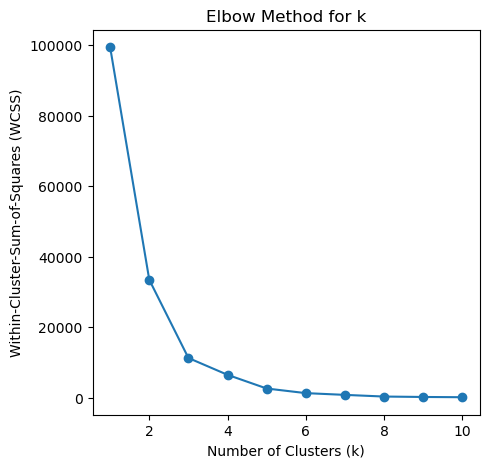

In [ ]:
#  Elbow Method
fig=plt.figure(figsize=(5,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()


In [ ]:
# Applying k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(normalized_df)

/Users/apoorvakomatineni/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [ ]:
# Add the cluster labels to the original dataset
customers['cluster_label'] = kmeans.labels_

In [ ]:
customers

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales,Customercategory,cluster_label
0,I138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,Medium,2
1,I317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Medium,2
2,I127801,266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,Low,0
3,I173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,Medium,1
4,I337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,Low,0
99453,I325143,569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,Low,0
99454,I824010,103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,Low,0
99455,I702964,800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,Medium,1


In [ ]:
# Use the replace method to replace cluster labels with the new labels
customers['cluster_label'].replace({0: 'Minimal Shoppers', 1: 'High-Value Customers', 2: 'Regular Customers'}, inplace=True)

In [ ]:
customers.groupby(by='cluster_label').mean()

/var/folders/dh/2vl01py94nq9f457b3m7m85w0000gn/T/ipykernel_4436/3941156764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers.groupby(by='cluster_label').mean()


,age,quantity,price,Sales
cluster_label,,,,
High-Value Customers,43.434122,4.750685,3860.563151,18255.692466
Minimal Shoppers,43.414842,2.623882,273.314912,651.384928
Regular Customers,43.472365,4.096873,1633.147642,6503.110028


In [ ]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[-0.44462393]
 [ 3.72458791]
 [ 0.9412347 ]]


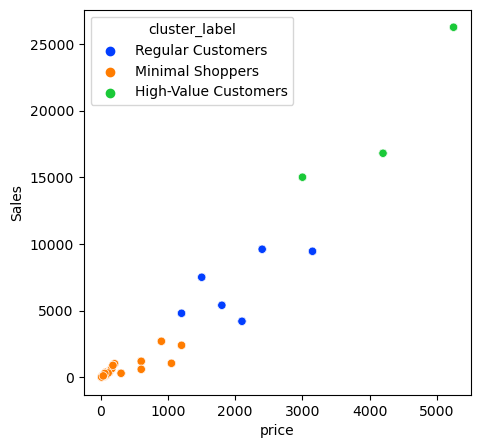

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.scatterplot(x='price', y='Sales', hue='cluster_label', data=customers,palette='bright')
plt.show()

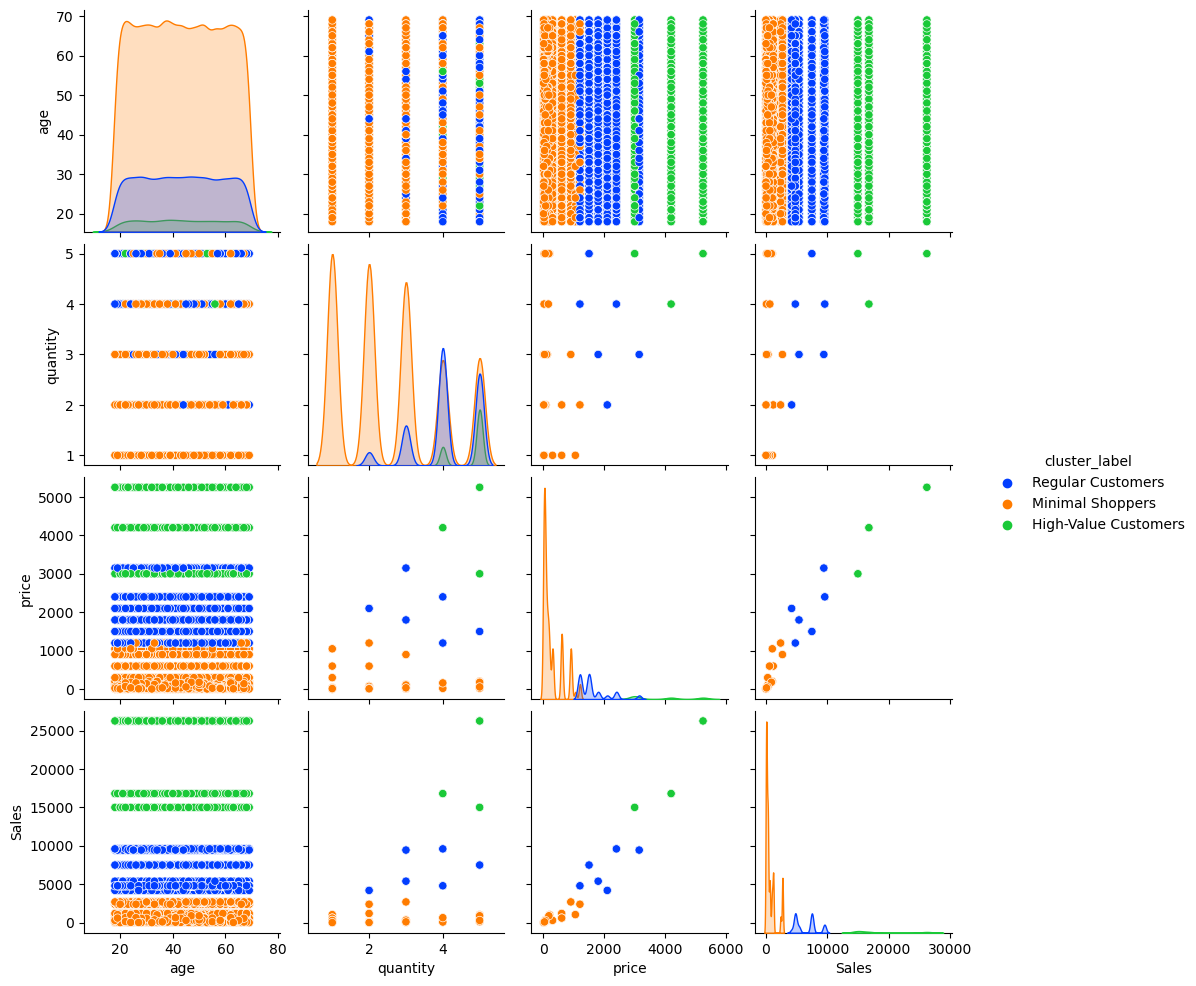

In [ ]:
import seaborn as sns
sns.pairplot(customers, hue='cluster_label',palette='bright')
plt.show()

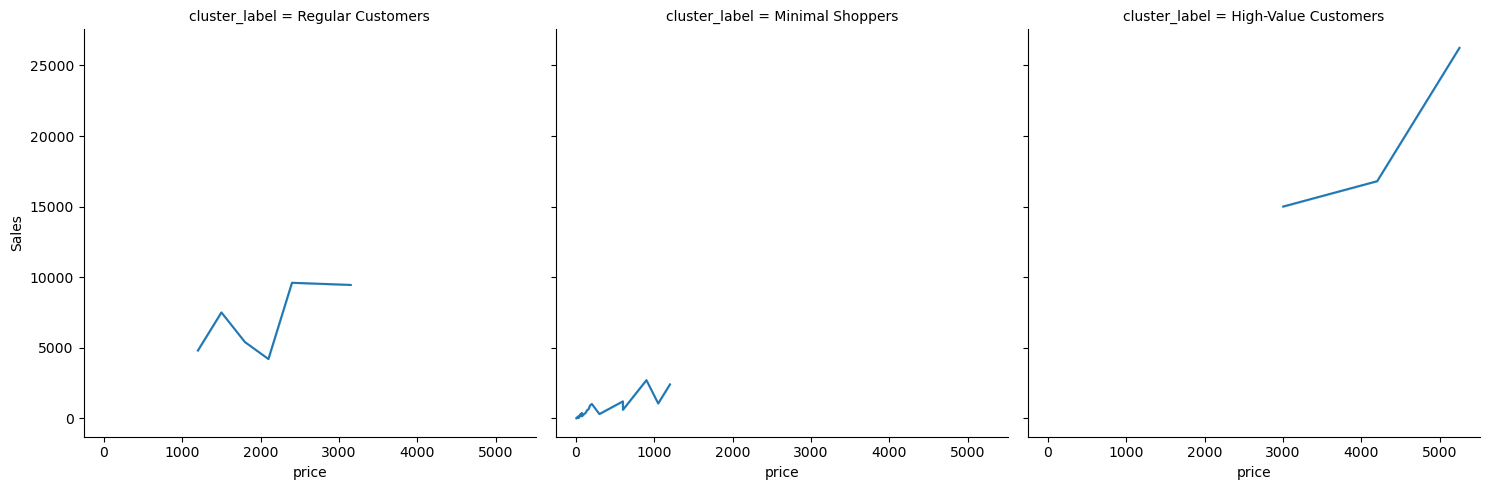

In [ ]:
sns.relplot(x=customers['price'],y=customers['Sales'],col=customers['cluster_label'],kind='line',height=5,aspect=1)
plt.show()

In [ ]:
silhouette_avg = silhouette_score(normalized_df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7979389816373397


In [ ]:
#exporting clustered data
customers.to_csv('/Users/apoorvakomatineni/Desktop/customers.csv')